# Breast Cancer Survival Time after Diagnosis
#### 1  Decision Tree

Data source: U.S. Department of Health and Human Services, National Institutes of Health, National Cancer Institute
Surveillance, Epidemiology, and End Results (SEER) Program - Incidences of Breast Cancer
https://seer.cancer.gov/


#### Purpose  
The purpose of this analysis is the determine the factors that contribute to mortality after a breast cancer diagnosis. Such analysis will be used uncover treatment strategies and provide a baseline for effectiveness.  

In [1]:
#Standard module set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Statistical modules 
import scipy.stats as stats

#Modeling modules
from sklearn import tree
from sklearn.model_selection import train_test_split

#### Data set  
The data set has been formatted and cleaned, then read into a csv file. Many of the independent variables are categorical, dummy variables were constructed to ease analysis. The data set contains patient by patient data, covering survival times, some basic patient and neoplasm characteristics. The variables are:  
srv_time_mon - Main dependent variable. Number of months the patient survives after a diagnosis.  
p_srv - Constructed from  the depenedent variable, the probability of survival after a diagnosis.  
c_srv - Constructed from the dependent variable, the count of patients surviving to the time point.  
log_odds - An alternate dependent variable and constructed from the dependent variable, the log odds of the patient survival after a diagnosis.  
REG - Independent variable, the US region where the diagnosis occurred.  
MAR_STAT - Independent variable, marital status of the patient.  
RACE1V - Independent variable, ethnicity of the patient.   
NHIADE - Independent variable, for hispanic ethnicities, further classifications.  
SEX - Independent variable, gender of the patient.  
AGE_DX - Independent variable, age of the patient at diagnosis.  
SEQ_NUM - Independent variable, number of previous diagnoses.   
LATERAL - Independent variable, side of body of the diagnosis.  
HISTO3V - Independent variable, histologic characteristics of the diagnosis.   
BEHO3V - Independent variable, behavior characterization of the neoplasm.  
GRADE - Independent variable, a classification of the severity of the neoplasm.  
HST_STGA - Independent variable, histologic stage of the neoplasm.  
MALIGCOUNT - Independent variable, the number of malignant neoplasms at diagnosis.  
BENBORDCOUNT - Independent variable, the number of benign neoplasms at diagnosis.  
PRIMSITE_coded - Independent variable, the primary site of the diagnosis.  

In [2]:
#Pull data set
cancer_sruviv = pd.read_csv('./data/dummied.csv')


cancer_sruviv = cancer_sruviv.drop('Unnamed: 0', axis=1)

In [3]:
#Split set for training and testing
train, test = train_test_split(cancer_sruviv)

#### Analysis  
The decision tree model on survival time in months has gross overfitting, no solution was identified. 

In [4]:
#Fit model
x = train.drop(['srv_time_mon', 'p_srv', 'c_srv', 'log_odds'], axis=1)
y = train.srv_time_mon

model = tree.DecisionTreeRegressor().fit(x, y)
print(f'Coefficient of determination: {np.round(model.score(x, y), 2)}')

Coefficient of determination: 0.9


In [5]:
#Resdiual analysis
y_pred = model.predict(x)
resid = y_pred - y
resid_stand = (resid.mean() - resid) / resid.std()

ks = stats.kstest(resid_stand, 'norm')[1]
rsd = np.round(np.sqrt(np.sum(resid**2) / (len(resid) - len(x.columns))) ,2)
rrse = np.round(np.sqrt(np.sum(resid**2) / np.sum((y.mean() - y)**2)), 2)
print(f'Residual sd: {rsd}\n'
      f'Relative root residual error:  {rrse}\n'
      f'KS test for normal residual distribution: '
      f'{ks}')

Residual sd: 23.0
Relative root residual error:  0.32
KS test for normal residual distribution: 0.0


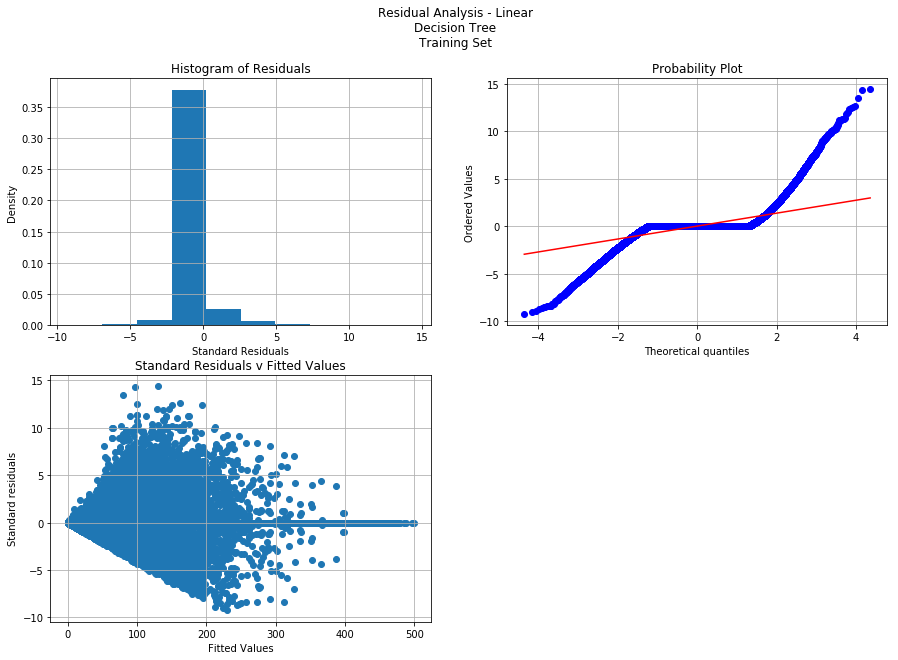

In [6]:
#Graphical residual analysis
plt.figure(figsize=(15,10))
plt.suptitle('Residual Analysis - Linear\nDecision Tree\n'
              'Training Set')

ax1 = plt.subplot(221)
plt.hist(resid_stand, density=True)
plt.title('Histogram of Residuals')
plt.xlabel('Standard Residuals')
plt.ylabel('Density')
plt.grid()

ax2 = plt.subplot(222)
plot = stats.probplot(resid_stand, plot=plt)
plt.grid()

ax= plt.subplot(223)
plt.scatter(y_pred, resid_stand)
plt.title('Standard Residuals v Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Standard residuals')

plt.grid()
# plt.savefig('./images/fig_1_decision_tree.png', transparent=True)
plt.show()



In [7]:
#Train test set
x_test = test.drop(['srv_time_mon', 'p_srv', 'c_srv', 'log_odds'], axis=1)
y_test = test.srv_time_mon
print(f'Coefficient of determination: {np.round(model.score(x_test, y_test), 2)}')

Coefficient of determination: -0.39


In [8]:
#Residual analysis of the test set

test_fit = model.predict(x_test)
test_resid = test_fit - y_test
test_resid_stand = (test_resid.mean() - test_resid) / test_resid.std()

ks_test = stats.kstest(test_resid_stand, 'norm')[1]
rsd_test = np.round(np.sqrt(np.sum(test_resid**2) / (len(test_resid) - len(x_test.columns))) ,2)
rrse_test = np.round(np.sqrt(np.sum(test_resid**2) / np.sum((y_test.mean() - y_test)**2)), 2)
print(f'Residual sd: {rsd_test}\n'
      f'Relative root residual error:  {rrse_test}\n'
      f'KS test for normal residual distribution: '
      f'{ks_test}')

Residual sd: 85.03
Relative root residual error:  1.18
KS test for normal residual distribution: 1.4859414062346566e-214


In [9]:
#This algorithm is used to test input parameters (hoes of reducing overfitting)
# a = list()
# for i in range(5,80, 5):
#     model_2 = tree.DecisionTreeRegressor(min_impurity_decrease  = i,).fit(x,y)
#     train_score = model_2.score(x, y)
#     test_score = model_2.score(x_test, y_test)
#     b = [i, train_score, test_score]
#     a.append(b)
#     print(i,train_score)
#     print(i,test_score)

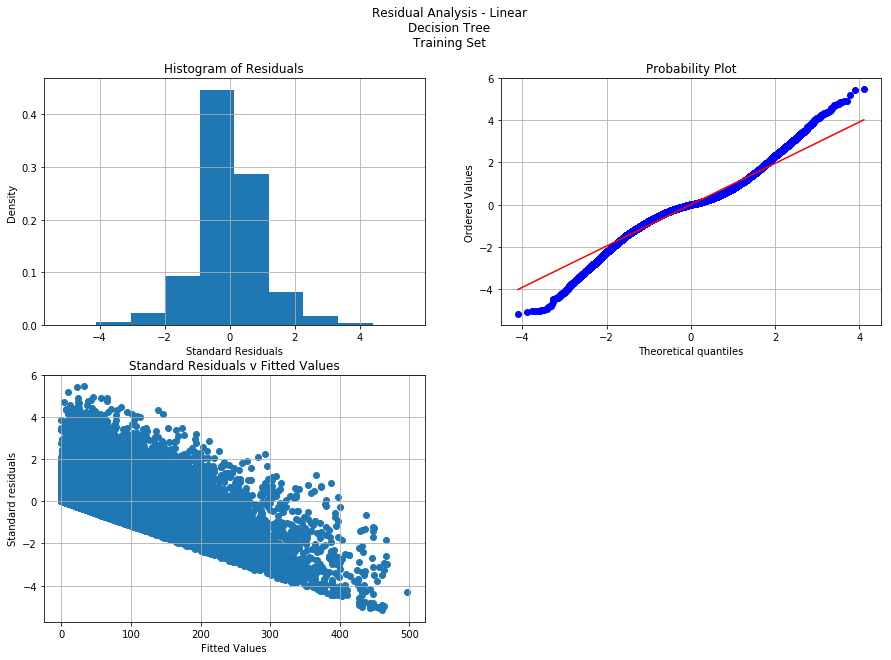

In [10]:
#Graphical summary of test residuals
plt.figure(figsize=(15,10))
plt.suptitle('Residual Analysis - Linear\nDecision Tree\n'
             'Training Set')

ax1 = plt.subplot(221)
plt.hist(test_resid_stand, density=True)
plt.title('Histogram of Residuals')
plt.xlabel('Standard Residuals')
plt.ylabel('Density')
plt.grid()

ax2 = plt.subplot(222)
plot = stats.probplot(test_resid_stand, plot=plt)
plt.grid()

ax3 = plt.subplot(223)
plt.scatter(test_fit, test_resid_stand)
plt.title('Standard Residuals v Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Standard residuals')

plt.grid()

# plt.savefig('./images/fig_2_Decision_tree.png', transparent=True)
plt.show()